# A glance on the R2B8 output for SMT-NATL

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%time
import sys
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
import pyicon as pyic
import cartopy.crs as ccrs
import glob, os
import xarray as xr
import pandas as pd
import cartopy
# import seawater as sw
import datetime

import multiprocessing
from dask_jobqueue import SLURMCluster # Setting up distributed memories via slurm
from dask.utils import format_bytes
from dask.distributed import Client, LocalCluster, progress # Libaray to orchestrate distributed resources

from tempfile import NamedTemporaryFile, TemporaryDirectory # Creating temporary Files/Dirs
from getpass import getuser # Libaray to copy things
from pathlib import Path # Object oriented libary to deal with paths

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots
CPU times: user 655 ms, sys: 357 ms, total: 1.01 s
Wall time: 2.52 s


/home/m/m300878/miniconda3/envs/pyicon_py39/lib/python3.9/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


## monthly mean data

In [6]:
path_data = '/work/mh0033/m211054/projects/icon/icon-oes-1.3.01/experiments/exp.ocean_era51h_r2b8_hel20218-ERA/outdata/'
path_data = '/work/mh0033/from_Mistral/mh0033/m211054/projects/icon/icon-oes-1.3.01/experiments/exp.ocean_era51h_r2b8_hel20218-ERA/outdata/'
fname = 'exp.ocean_era51h_r2b8_hel20218-ERA_diag_20100101T000000Z.nc'
fname = 'exp.ocean_era51h_r2b8_hel20218-ERA_oceanMonitor_20100101T000000Z.nc'
fname = 'exp.ocean_era51h_r2b8_hel20218-ERA_20100101T000000Z.nc'
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b8_oce_r0004/ckdtree/rectgrids/r2b8_oce_r0004_res0.10_180W-180E_90S-90N.npz'

is the data only monthly available? Are these instantaneous fields?

In [7]:
#### prep. dask cluster
search_str = f'exp.ocean_era51h_r2b8_hel20218-ERA_2010*.nc' 
flist      = np.array(glob.glob(path_data+search_str))
flist.sort()

In [9]:
#ds = xr.open_dataset(path_data + fname)
do = xr.open_mfdataset(flist, combine="nested", concat_dim="time", chunks=dict(time=1))

In [10]:
do

<xarray.Dataset>
Dimensions:                         (ncells: 3729001, time: 12, vertices: 3,
                                     ncells_2: 5612762, vertices_2: 4,
                                     depth: 128, depth_2: 129, lev: 1)
Coordinates:
    clon                            (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
    clat                            (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
    elon                            (ncells_2) float32 dask.array<chunksize=(5612762,), meta=np.ndarray>
    elat                            (ncells_2) float32 dask.array<chunksize=(5612762,), meta=np.ndarray>
  * depth                           (depth) float64 5.5 15.5 ... 6.262e+03
  * depth_2                         (depth_2) float64 0.0 11.0 ... 6.362e+03
  * lev                             (lev) float64 0.0
  * time                            (time) datetime64[ns] 2010-01-01 ... 2010...
Dimensions without coordinates: ncells, vertices, ncells_2, vertices_2
Data variables: (12/40)
    clon_bnds                       (time, ncells, vertices) float32 dask.array<chunksize=(1, 3729001, 3), meta=np.ndarray>
    clat_bnds                       (time, ncells, vertices) float32 dask.array<chunksize=(1, 3729001, 3), meta=np.ndarray>
    elon_bnds                       (time, ncells_2, vertices_2) float32 dask.array<chunksize=(1, 5612762, 4), meta=np.ndarray>
    elat_bnds                       (time, ncells_2, vertices_2) float32 dask.array<chunksize=(1, 5612762, 4), meta=np.ndarray>
    zos                             (time, ncells) float32 dask.array<chunksize=(1, 3729001), meta=np.ndarray>
    to                              (time, depth, ncells) float32 dask.array<chunksize=(1, 128, 3729001), meta=np.ndarray>
    ...                              ...
    velocity_windMixing             (time, depth_2, ncells_2) float32 dask.array<chunksize=(1, 129, 5612762), meta=np.ndarray>
    tracer_windMixing               (time, depth_2, ncells) float32 dask.array<chunksize=(1, 129, 3729001), meta=np.ndarray>
    K_tracer_h_to                   (time, depth, ncells_2) float32 dask.array<chunksize=(1, 128, 5612762), meta=np.ndarray>
    A_tracer_v_to                   (time, depth_2, ncells) float32 dask.array<chunksize=(1, 129, 3729001), meta=np.ndarray>
    K_tracer_h_so                   (time, depth, ncells_2) float32 dask.array<chunksize=(1, 128, 5612762), meta=np.ndarray>
    A_tracer_v_so                   (time, depth_2, ncells) float32 dask.array<chunksize=(1, 129, 3729001), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  42
    uuidOfHGrid:          66c2eb2c-9bd9-11e8-97bc-e1d6091d8653
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-oes.git@80c1ffd53ef5dd...
    history:              /work/mh0033/m211054/projects/icon/icon-oes-1.3.01/...
    references:           see MPIM/DWD publications
    comment:              Helmuth Haak (m211054) on m10594 (Linux 2.6.32-754....

In [68]:
lon_reg = -75, -10
lat_reg = 39.05, 39.1

### make section using pyic.interp_to_rectgrid

In [69]:
ds = do
sst_mf = ds.isel(depth=0).isel(time=slice(0,3))
sst_mf.compute()

<xarray.DataArray 'to' (time: 3, ncells: 3729001)>
array([[-1.8      , -1.8      , -1.8      , ..., 10.556308 , 10.708282 ,
        10.379648 ],
       [-1.8000001, -1.7999994, -1.8000001, ..., 11.357691 , 11.353236 ,
        11.09762  ],
       [-1.8      , -1.8000001, -1.8      , ..., 11.829219 , 11.851164 ,
        11.837483 ]], dtype=float32)
Coordinates:
    clon     (ncells) float32 1.274 1.278 1.27 1.274 ... 1.333 1.332 1.333 1.335
    clat     (ncells) float32 1.259 1.26 1.26 1.258 ... -0.7892 -0.787 -0.7891
    depth    float64 5.5
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01
Dimensions without coordinates: ncells
Attributes:
    standard_name:                sea_water_potential_temperature
    long_name:                    sea water potential temperature
    units:                        deg C
    code:                         2
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [70]:
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b8_oce_r0004/ckdtree/rectgrids/r2b8_oce_r0004_res0.10_180W-180E_90S-90N.nc'
data = pyic.interp_to_rectgrid_xr(sst_mf, fpath_ckdtree=fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
data

<xarray.DataArray 'to' (time: 3, lat: 1, lon: 650)>
array([[[ 9.538377 ,  0.       ,  0.       , ..., 16.009901 ,
         15.933661 , 15.843047 ]],

       [[ 4.2190237,  0.       ,  0.       , ..., 15.031963 ,
         14.934602 , 14.818517 ]],

       [[ 3.4127634,  0.       ,  0.       , ..., 14.18924  ,
         14.193031 , 14.098218 ]]], dtype=float32)
Coordinates:
    clon     (lat, lon) float32 -1.308 -1.305 -1.305 ... -0.1776 -0.176 -0.1747
    clat     (lat, lon) float32 0.6829 0.683 0.683 ... 0.6829 0.6824 0.6831
    depth    float64 5.5
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01
  * lat      (lat) float64 39.1
  * lon      (lon) float64 -74.9 -74.8 -74.7 -74.6 ... -10.3 -10.2 -10.1 -10.0
Attributes:
    standard_name:                sea_water_potential_temperature
    long_name:                    sea water potential temperature
    units:                        deg C
    code:                         2
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

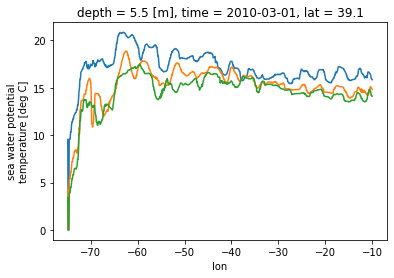

In [71]:
fig = plt.figure()
data.isel(time=0).plot()
data.isel(time=1).plot()
data.isel(time=2).plot()

In [20]:
fpath = f'/work/mh0033/u241317/r2b8/sst/sst_3month.nc'
SST.to_netcdf(fpath)

## using ckdtree_section

In [91]:
lon_reg = -75, -10
lat_reg = 39.1, 39.1

In [92]:

# carfully choose npoints to have only unique values
# pyicon function has to be adapted, select save directory
sname = 'r2b8_75_10W_39N'
#path_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
tgname        = 'r2b8_oce_r0004'
#gname         = 'OceanOnly_Global_IcosSymmetric_0010km_rotatedZ37d_modified_sills_srtm30_1min' #_res0.02_180W-180E_90S-90N'
gname = 'r2b8_oce_r0004_tgrid'
path_tgrid    = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b8_oce_r0004/'
#path_tgrid    = f'/pool/data/ICON/oes/grids/OceanOnly/'

fname_tgrid   = f'{gname}.nc'
#fname_tgrid   = f'r2b8_oce_r0004.nc'
#fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b8_oce_r0004/ckdtree/rectgrids/r2b8_oce_r0004_res0.02_180W-180E_90S-90N.npz'
path_ckdtree  = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{tgname}/ckdtree/'
path_ckdtree = path_scratch
path_rgrid    = path_ckdtree + 'rectgrids/'
path_sections = path_ckdtree + 'sections/'
path_scratch  = f'/scratch/u/u241317/tmp/'
fpath_to_indices = path_scratch + 'indices.nc'


dckdtree, ickdtree, lon_sec, lat_sec, dist_sec = pyic.ckdtree_section(p1=[lon_reg[1],lat_reg[0]], p2=[lon_reg[0],lat_reg[0]], npoints=650,
                      fname_tgrid  = fname_tgrid,
                      path_tgrid   = path_tgrid,
                      path_ckdtree = path_ckdtree,
                      sname = sname,
                      gname = gname,
                      tgname = tgname,
                      load_egrid=False,
                      load_vgrid=False,
                      )

Saving grid file: /scratch/u/u241317/tmp/r2b8_oce_r0004_nps650_10W39.1N_75W39.1N.npz


In [93]:
ds = do.to
ds = ds.isel(ncells=ickdtree)
ds = ds.isel(depth=0).isel(time=slice(0,3))
ds = ds.assign_coords({"clon": ("ncells", np.rad2deg(ds.clon.data))})
ds = ds.assign_coords({"clat": ("ncells", np.rad2deg(ds.clat.data))})
ds = ds.assign_coords({"rlon": ("ncells", lon_sec)}) #keep old lat and lon TODO overwrite
ds = ds.assign_coords({"rlat": ("ncells", lat_sec)})
ds = ds.compute()
ds

<xarray.DataArray 'to' (time: 3, ncells: 650)>
array([[15.843047 , 15.933661 , 16.009901 , ...,  0.       ,  9.538377 ,
         9.538377 ],
       [14.818517 , 14.934602 , 15.031963 , ...,  0.       ,  4.2190237,
         4.2190237],
       [14.098218 , 14.193031 , 14.18924  , ...,  0.       ,  3.4127634,
         3.4127634]], dtype=float32)
Coordinates:
    clon     (ncells) float32 -10.01 -10.08 -10.18 ... -74.77 -74.94 -74.94
    clat     (ncells) float32 39.14 39.1 39.13 39.11 ... 39.13 39.13 39.13 39.13
    depth    float64 5.5
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01
    rlon     (ncells) float64 -10.0 -10.1 -10.2 -10.3 ... -74.8 -74.9 -75.0
    rlat     (ncells) float64 39.1 39.1 39.1 39.1 39.1 ... 39.1 39.1 39.1 39.1
Dimensions without coordinates: ncells
Attributes:
    standard_name:                sea_water_potential_temperature
    long_name:                    sea water potential temperature
    units:                        deg C
    code:                         2
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

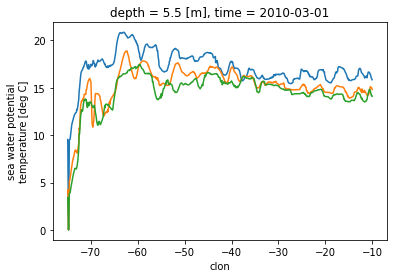

In [94]:
fig = plt.figure()
ds.isel(time=0).plot(x="clon")
ds.isel(time=1).plot(x="clon")
ds.isel(time=2).plot(x="clon")

## comparison with same amount of points

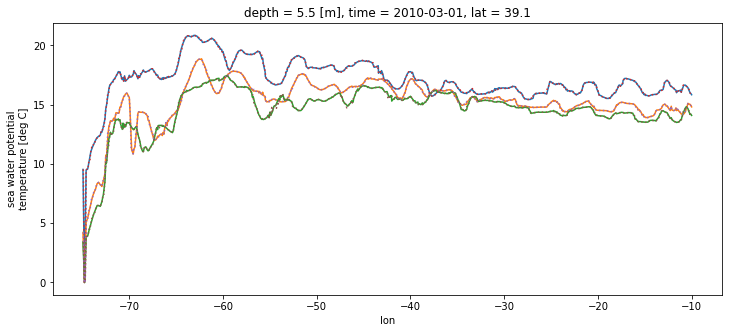

In [99]:
fig = plt.figure(figsize=(12,5))
ds.isel(time=0).plot(x="clon")
ds.isel(time=1).plot(x="clon")
ds.isel(time=2).plot(x="clon")

data.isel(time=0).plot(linestyle=":")
data.isel(time=1).plot(linestyle=":")
data.isel(time=2).plot(linestyle=":")

Output()

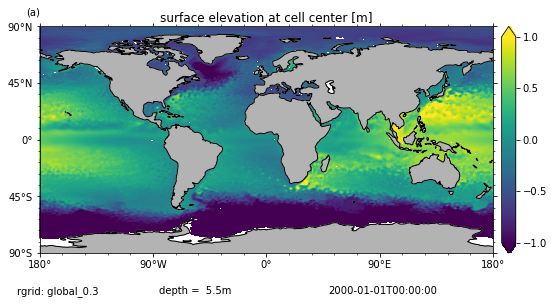

In [33]:
PyicV = pyic.view.hplot(IcD, logplot=False)

ValueError: Cannot specify both x and y kwargs for line plots.

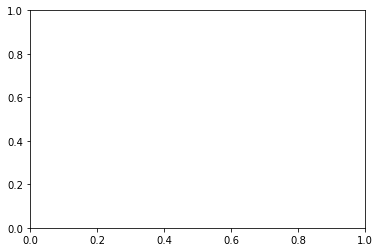

In [107]:
sst = do.isel(time=0).isel(depth=0).to
fig = plt.figure()
sst.plot(x="clon",y="clat", data="to")

In [105]:
sst

<xarray.DataArray 'to' (ncells: 3729001)>
dask.array<getitem, shape=(3729001,), dtype=float32, chunksize=(3729001,), chunktype=numpy.ndarray>
Coordinates:
    clon     (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
    clat     (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
    depth    float64 5.5
    time     datetime64[ns] 2010-01-01
Dimensions without coordinates: ncells
Attributes:
    standard_name:                sea_water_potential_temperature
    long_name:                    sea water potential temperature
    units:                        deg C
    code:                         2
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1